In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
r = load_boston()
data = r["data"]
tars = r["target"]
names = r["feature_names"]
df = pd.DataFrame(data, columns =names )
df["MEDV"] = tars

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
for index, row in df.iterrows():
    print(index,row)

0 CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
MEDV        24.00000
Name: 0, dtype: float64
1 CRIM         0.02731
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           6.42100
AGE         78.90000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          396.90000
LSTAT        9.14000
MEDV        21.60000
Name: 1, dtype: float64
2 CRIM         0.02729
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           7.18500
AGE         61.10000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          392.83000
LSTAT        4.03000
MEDV        34.70000
Name: 2, dtype: float64
3 CRIM         0.03237
ZN           0.00

Name: 153, dtype: float64
154 CRIM         1.41385
ZN           0.00000
INDUS       19.58000
CHAS         1.00000
NOX          0.87100
RM           6.12900
AGE         96.00000
DIS          1.74940
RAD          5.00000
TAX        403.00000
PTRATIO     14.70000
B          321.02000
LSTAT       15.12000
MEDV        17.00000
Name: 154, dtype: float64
155 CRIM         3.53501
ZN           0.00000
INDUS       19.58000
CHAS         1.00000
NOX          0.87100
RM           6.15200
AGE         82.60000
DIS          1.74550
RAD          5.00000
TAX        403.00000
PTRATIO     14.70000
B           88.01000
LSTAT       15.02000
MEDV        15.60000
Name: 155, dtype: float64
156 CRIM         2.44668
ZN           0.00000
INDUS       19.58000
CHAS         0.00000
NOX          0.87100
RM           5.27200
AGE         94.00000
DIS          1.73640
RAD          5.00000
TAX        403.00000
PTRATIO     14.70000
B           88.63000
LSTAT       16.14000
MEDV        13.10000
Name: 156, dtype: float64
15

Name: 281, dtype: float64
282 CRIM         0.06129
ZN          20.00000
INDUS        3.33000
CHAS         1.00000
NOX          0.44290
RM           7.64500
AGE         49.70000
DIS          5.21190
RAD          5.00000
TAX        216.00000
PTRATIO     14.90000
B          377.07000
LSTAT        3.01000
MEDV        46.00000
Name: 282, dtype: float64
283 CRIM         0.01501
ZN          90.00000
INDUS        1.21000
CHAS         1.00000
NOX          0.40100
RM           7.92300
AGE         24.80000
DIS          5.88500
RAD          1.00000
TAX        198.00000
PTRATIO     13.60000
B          395.52000
LSTAT        3.16000
MEDV        50.00000
Name: 283, dtype: float64
284 CRIM         0.00906
ZN          90.00000
INDUS        2.97000
CHAS         0.00000
NOX          0.40000
RM           7.08800
AGE         20.80000
DIS          7.30730
RAD          1.00000
TAX        285.00000
PTRATIO     15.30000
B          394.72000
LSTAT        7.85000
MEDV        32.20000
Name: 284, dtype: float64
28

410 CRIM        51.1358
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.5970
RM           5.7570
AGE        100.0000
DIS          1.4130
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B            2.6000
LSTAT       10.1100
MEDV        15.0000
Name: 410, dtype: float64
411 CRIM        14.0507
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.5970
RM           6.6570
AGE        100.0000
DIS          1.5275
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B           35.0500
LSTAT       21.2200
MEDV        17.2000
Name: 411, dtype: float64
412 CRIM        18.8110
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.5970
RM           4.6280
AGE        100.0000
DIS          1.5539
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B           28.7900
LSTAT       34.3700
MEDV        17.9000
Name: 412, dtype: float64
413 CRIM        28.6558
ZN           0.0000
INDUS       18.1000
CHAS  

In [5]:
df.shape[0] - df.count()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
np.count_nonzero(df.isnull()) # all clean

0

<AxesSubplot:>

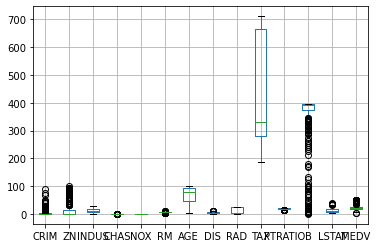

In [7]:
df.boxplot() # since we are building a regression tree we dont really want to normalize the data or search for the outliers

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:df.shape[1]-1], df["MEDV"], test_size=0.33, random_state=42)

In [9]:
clf = tree.DecisionTreeRegressor()

In [10]:
# lets see how the impurity of our leaves is going to change as we increase ccp parametr

In [11]:
path = clf.cost_complexity_pruning_path(X_train, y_train)

In [12]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

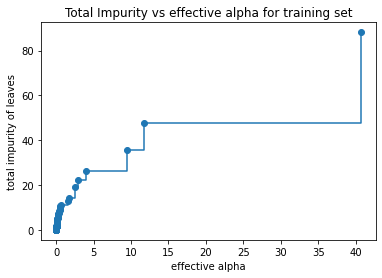

In [13]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[::], impurities[::], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [14]:
# as you see, if we increase our post pruning param, the impurity increases too, resulting in very insufficient model
# values from 0-5 (at least for now) seems more reasonable

In [15]:
clfs = [] # lets gather the models with different ccp params

for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 40.650867793462815


In [16]:
# yes with ccp = 40.65 we have only one node remaining - that is, again, not what we want

In [17]:
clfs = clfs[:-1] # lets get rid of this last model with ccp = 40.65
ccp_alphas = ccp_alphas[:-1]

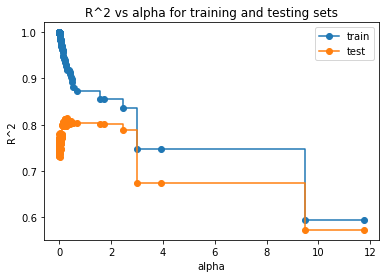

In [18]:
# now, we plot R^2 score for test and train sets vs different ccp parametrs

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("R^2")
ax.set_title("R^2 vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [74]:
# again, big ccp values result in poor R^2, or underfitting (for train and test sets), but if we let it be 0 our model will
# likely to be overfitted (as you see with ccp close to 0 we have low R^2 for test data, but if we increase it a bit it will grow). 
#So, lets try out values from 0.2 to 4. 

In [75]:
cands = []
for i in ccp_alphas:
    if 0.2 <= round(i,7) <= 4:
        cands.append(round(i,5))
cands

[0.20649,
 0.2166,
 0.22896,
 0.24447,
 0.2612,
 0.26304,
 0.27655,
 0.28717,
 0.36035,
 0.40734,
 0.42239,
 0.4614,
 0.49974,
 0.50452,
 0.50709,
 0.66528,
 1.56511,
 1.74079,
 2.46527,
 2.98092,
 3.93782]

In [76]:
best_cand = [-float("inf"), None] # since our metric is neg_mean_squared_error, we will seacrh for the maximum, not minimum error

for score in cands:
    model = tree.DecisionTreeRegressor(ccp_alpha= score)
    mean = cross_val_score(model, X_train, y_train, cv=5, scoring = "neg_mean_squared_error").mean()
    
    if mean > best_cand[0]: # negative mean error is bigger than the current - make it current
        best_cand = [mean, model]

print(best_cand)

[-25.21710978601823, DecisionTreeRegressor(ccp_alpha=0.2612)]


In [77]:
# it appears that model with ccp_alpha=0.26304 has the biggest neg mean error

In [78]:
final_m = tree.DecisionTreeRegressor(ccp_alpha=0.26304)
final_m.fit(X_train,y_train)
final_m.score(X_train,y_train) # good result for traning set

0.9267490703183084

In [79]:
hats = final_m.predict(X_test)
error = mse(y_test, hats,squared=False)

In [80]:
error # our rmse error on the testing set

3.916106539464408

[Text(0.47413793103448276, 0.9285714285714286, 'X[12] <= 7.865\nsquared_error = 88.144\nsamples = 339\nvalue = 22.971'),
 Text(0.22413793103448276, 0.7857142857142857, 'X[5] <= 7.437\nsquared_error = 78.197\nsamples = 106\nvalue = 32.424'),
 Text(0.10344827586206896, 0.6428571428571429, 'X[7] <= 1.557\nsquared_error = 39.805\nsamples = 84\nvalue = 29.286'),
 Text(0.06896551724137931, 0.5, 'squared_error = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(0.13793103448275862, 0.5, 'X[5] <= 6.797\nsquared_error = 24.799\nsamples = 81\nvalue = 28.519'),
 Text(0.06896551724137931, 0.35714285714285715, 'X[5] <= 6.542\nsquared_error = 9.393\nsamples = 44\nvalue = 25.28'),
 Text(0.034482758620689655, 0.21428571428571427, 'squared_error = 2.404\nsamples = 23\nvalue = 23.396'),
 Text(0.10344827586206896, 0.21428571428571427, 'squared_error = 8.902\nsamples = 21\nvalue = 27.343'),
 Text(0.20689655172413793, 0.35714285714285715, 'X[10] <= 19.45\nsquared_error = 15.807\nsamples = 37\nvalue = 32.37'),
 Text(

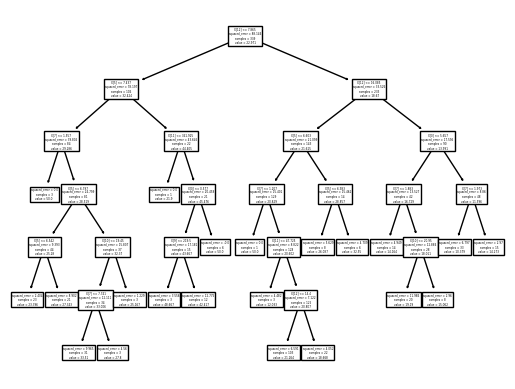

In [81]:
tree.plot_tree(final_m) # plot the tree

In [82]:
import random
ind = random.randrange(0, len(df))
some_tuple = df.iloc[[ind], 0:df.shape[1]-1]
value = df.iloc[ind, df.shape[1]-1]
some_pred = final_m.predict(some_tuple)
print(f"models prediction: {some_pred}\n actual value: {value}")

models prediction: [21.26407767]
 actual value: 21.4
